In [1]:
# Import dependancies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Set the path for the property sales data and read the CSV into a dataframe
path = "Resources/aus-property-sales-sep2018-april2020.csv"

sales_df = pd.read_csv(path)
sales_df.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018-09-18 00:00:00,NaN,Darling Point,Sydney,NSW,-33.869565,151.241317,3,unit,NSW1221,NSW180
1,2018-09-24 00:00:00,NaN,Darling Point,Sydney,NSW,-33.872179,151.239726,3,unit,NSW1221,NSW180
2,2018-09-26 00:00:00,1730000.0,Darling Point,Sydney,NSW,-33.868386,151.237471,2,unit,NSW1221,NSW180
3,2018-09-26 00:00:00,1928000.0,Darling Point,Sydney,NSW,-33.875465,151.236280,3,unit,NSW1221,NSW180
4,2018-10-02 00:00:00,1475000.0,Darling Point,Sydney,NSW,-33.875734,151.233575,3,unit,NSW1221,NSW180


In [3]:
# Filter the dataframe to only contain results in Victoria
victorian_sales_df = sales_df.loc[sales_df["state"] == "VIC", :].reset_index(drop=True)
victorian_sales_df.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018-09-04 00:00:00,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit,VIC1150,VIC129
1,2018-09-05 00:00:00,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit,VIC1150,VIC129
2,2018-11-02 00:00:00,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit,VIC1150,VIC129
3,2018-11-02 00:00:00,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit,VIC1150,VIC129
4,2018-11-03 00:00:00,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit,VIC1150,VIC129


In [4]:
# Look through the data to see if there are any missing values
victorian_sales_df.count()

date_sold        119180
price             98550
suburb           119180
city_name        119180
state            119180
lat              119163
lon              119163
bedrooms         119180
property_type    119180
loc_pid          119180
lga_pid          119180
dtype: int64

In [5]:
# Drop any rows that are incomplete
# The missing values are price, this is the most important variable for our analysis so it's safe to drop those rows
victorian_sales_df.dropna(how = "any", inplace = True)

In [6]:
# Check that the rows have been dropped successfully
# There is still plenty of remaining data for the analysis
victorian_sales_df.count()

date_sold        98535
price            98535
suburb           98535
city_name        98535
state            98535
lat              98535
lon              98535
bedrooms         98535
property_type    98535
loc_pid          98535
lga_pid          98535
dtype: int64

In [7]:
# Remove the time component of the date_sold column, leaving only the date of the transaction
victorian_sales_df["date_sold"] = victorian_sales_df["date_sold"].str[0:10]
victorian_sales_df.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid
0,2018-09-04,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit,VIC1150,VIC129
1,2018-09-05,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit,VIC1150,VIC129
2,2018-11-02,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit,VIC1150,VIC129
3,2018-11-02,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit,VIC1150,VIC129
4,2018-11-03,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit,VIC1150,VIC129


In [8]:
# Set the path for a CSV created to match suburbs and Local Government Areas and read into a dataframe
path = "output/suburb_lga_df.csv"

suburb_lga_df = pd.read_csv(path)
suburb_lga_df.rename(columns = {"Suburb": "suburb"}, inplace=True)
suburb_lga_df.head()

,suburb,LGA_Name
0,Alberton,Wellington
1,Allansford,Warrnambool
2,Avoca,Pyrenees
3,Avenel,Strathbogie
4,Warrandyte,Manningham


In [9]:
# Merge the LGA into the main dataframe
clean_vic_sales_df = pd.merge(victorian_sales_df, suburb_lga_df, how = "left", on = "suburb")
clean_vic_sales_df.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,LGA_Name
0,2018-09-04,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit,VIC1150,VIC129,Yarra
1,2018-09-05,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit,VIC1150,VIC129,Yarra
2,2018-11-02,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit,VIC1150,VIC129,Yarra
3,2018-11-02,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit,VIC1150,VIC129,Yarra
4,2018-11-03,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit,VIC1150,VIC129,Yarra


In [10]:
# Look through the data to see if there are any missing values
clean_vic_sales_df.count()

date_sold        110625
price            110625
suburb           110625
city_name        110625
state            110625
lat              110625
lon              110625
bedrooms         110625
property_type    110625
loc_pid          110625
lga_pid          110625
LGA_Name         103212
dtype: int64

In [11]:
# Drop any rows that are incomplete
# Since we need the LGA for our analysis, we have to drops these rows
clean_vic_sales_df.dropna(how = "any", inplace = True)

In [12]:
# Check that the rows have been dropped successfully
clean_vic_sales_df.count()

date_sold        103212
price            103212
suburb           103212
city_name        103212
state            103212
lat              103212
lon              103212
bedrooms         103212
property_type    103212
loc_pid          103212
lga_pid          103212
LGA_Name         103212
dtype: int64

In [13]:
# Preview the dataframe
clean_vic_sales_df.head()

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,LGA_Name
0,2018-09-04,337500.0,Healesville,Melbourne,VIC,-37.661765,145.510034,1,unit,VIC1150,VIC129,Yarra
1,2018-09-05,370000.0,Healesville,Melbourne,VIC,-37.648961,145.522798,2,unit,VIC1150,VIC129,Yarra
2,2018-11-02,320000.0,Healesville,Melbourne,VIC,-37.663509,145.509362,2,unit,VIC1150,VIC129,Yarra
3,2018-11-02,385000.0,Healesville,Melbourne,VIC,-37.637402,145.497330,2,unit,VIC1150,VIC129,Yarra
4,2018-11-03,440000.0,Healesville,Melbourne,VIC,-37.662562,145.509064,3,unit,VIC1150,VIC129,Yarra


In [14]:
# Sorting the dataframe by date, and resetting the index
clean_vic_sales_df = clean_vic_sales_df.sort_values(by = "date_sold", ascending = True).reset_index(drop = True)

In [15]:
# Finding the first row after February 2020
clean_vic_sales_df.loc[clean_vic_sales_df["date_sold"] == "2020-02-01", :].head(1)

,date_sold,price,suburb,city_name,state,lat,lon,bedrooms,property_type,loc_pid,lga_pid,LGA_Name
80882,2020-02-01,485000.0,Melbourne,Melbourne,VIC,-37.817137,144.960121,1,unit,VIC1634,VIC107,Melbourne


In [16]:
# Splitting the dataframe into pre-COVID (before Feb 2020) and creating a CSV
vic_sales_precovid_df = clean_vic_sales_df[0:80881]
vic_sales_precovid_df.to_csv("output/vic-sales-precovid.csv")

In [17]:
# Splitting the dataframe into post-COVID (after Feb 2020) and creating a CSV
vic_sales_postcovid_df = clean_vic_sales_df[80882:]
vic_sales_postcovid_df.to_csv("output/vic-sales-postcovid.csv")

In [18]:
# Creating a dataframe to analyse pre-COVID data per month
monthly_sales_precovid_df = pd.DataFrame(vic_sales_precovid_df)

# Removing the day of the month from the date_sold column
monthly_sales_precovid_df["date_sold"] = monthly_sales_precovid_df["date_sold"].str[0:7]

# Calculating some summary statistics about the price data
mean_price = round(monthly_sales_precovid_df["price"].mean(),2)
median_price = round(monthly_sales_precovid_df["price"].median(),2)

min_price = round(monthly_sales_precovid_df["price"].min(),2)
max_price = round(monthly_sales_precovid_df["price"].max(),2)
print(f"The average Victorian house price in the data is ${mean_price}, while the median is ${median_price}")
print(f"The minimum Victorian house price in the data is ${min_price}, while the maximum is ${max_price}")

# Calculating the upper and lower bounds to understand any outliers
quartiles = monthly_sales_precovid_df["price"].quantile([0.25, 0.5, 0.75])
upper_quartile = quartiles[0.75]
lower_quartile = quartiles[0.25]
iqr = upper_quartile - lower_quartile

# Determining outliers using the upper and lower bounds
upper_bound = upper_quartile + (1.5 * iqr)
lower_bound = lower_quartile - (1.5 * iqr)
print(f"Any values above ${round(upper_bound,2)} or below ${round(lower_quartile,2)} may be an outlier")

# Printing out the results
outliers = len(monthly_sales_precovid_df.loc[(monthly_sales_precovid_df["price"] > upper_bound) | (monthly_sales_precovid_df["price"] < lower_bound), :])
outliers_percent = round((outliers / len(monthly_sales_precovid_df)) * 100,2)
print(f"The number of outliers in the price data is {outliers}, or {outliers_percent}%")

The average Victorian house price in the data is $804720.92, while the median is $655500.0
The minimum Victorian house price in the data is $50000.0, while the maximum is $9600000.0
Any values above $1495000.0 or below $520000.0 may be an outlier
The number of outliers in the price data is 5949, or 7.36%


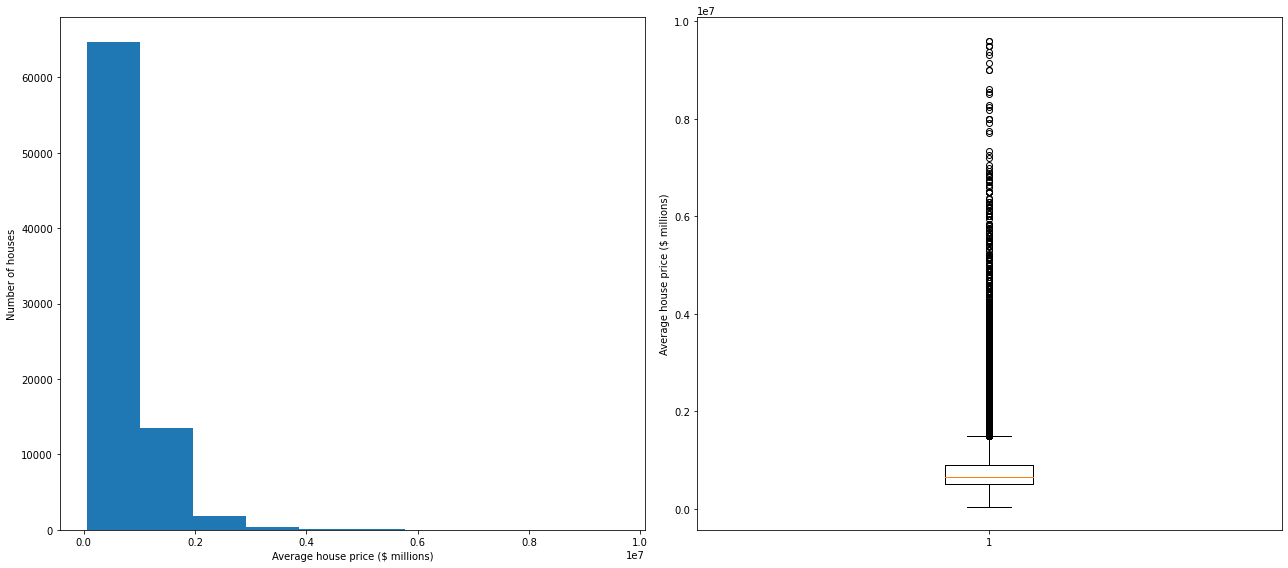

In [19]:
# Creating a histogarm and box plot for the pre-COVID house data
plt.figure(figsize=(18,8))

# Creating the histogram and setting labels
plt.subplot(1, 2, 1)
plt.hist(monthly_sales_precovid_df["price"])
plt.ylabel("Number of houses")
plt.xlabel("Average house price ($ millions)")

# Creating the boxplot and setting labels
plt.subplot(1, 2, 2)
plt.boxplot(monthly_sales_precovid_df["price"])
plt.ylabel("Average house price ($ millions)")

# Displaying the chart
plt.tight_layout()
plt.show()

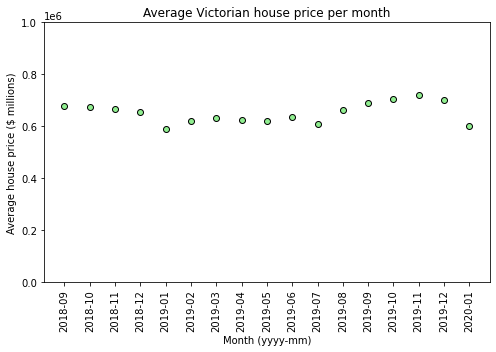

In [20]:
# Grouping the data by the month and calculating the average price
median_price_precovid_df = monthly_sales_precovid_df.groupby("date_sold").median().reset_index()

# Setting the x and y values for the plot
x_values = median_price_precovid_df["date_sold"]
y_values = median_price_precovid_df["price"]

# Creating a scatter plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c = "lightgreen", edgecolors = "black")
plt.xticks(rotation = "vertical")

# Formatting & labelling the plot
plt.ylim(0, 1000000)
plt.title("Average Victorian house price per month")
plt.ylabel("Average house price ($ millions)")
plt.xlabel("Month (yyyy-mm)")

# Displaying the plot
plt.tight_layout()
plt.show()

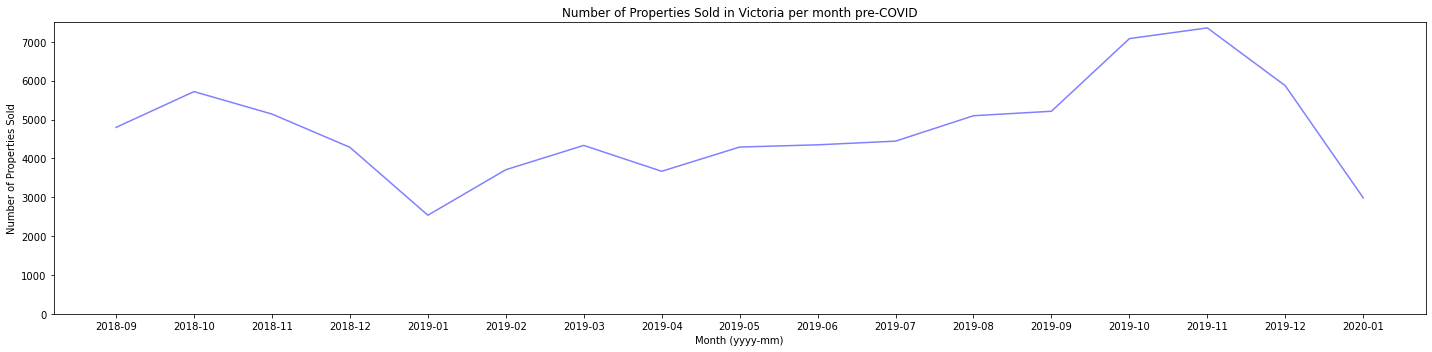

In [21]:
# Grouping the data by month and calculating the number of sales
monthly_count_precovid_df = monthly_sales_precovid_df.groupby("date_sold").count().reset_index()

# Setting the x and y values for the plot
x_values = monthly_count_precovid_df["date_sold"]
y_values = monthly_count_precovid_df["price"]

# Creating a bar chart
plt.figure(figsize=(20,5))
plt.plot(x_values, y_values, color='b', alpha=0.5)
plt.ylim(0, 7500)

# Formatting & labelling the plot
plt.xlabel('Month (yyyy-mm)')
plt.ylabel('Number of Properties Sold')
plt.title('Number of Properties Sold in Victoria per month pre-COVID')

# Displaying the plot
plt.tight_layout()
plt.show()

In [22]:
# Finding the median house price per LGA for each month in the data
rate_of_change = vic_sales_precovid_df.groupby(["LGA_Name", "date_sold"]).median()
rate_of_change["Rate of Change"] = rate_of_change["price"].pct_change()

# Setting up a list to hold all unique LGA names and filling with the first index in the dataframe
LGA_list = rate_of_change.reset_index()
LGA_list = [LGA_list.iloc[0, 0]]

# Setting up empty lists to store the house price for each LGA, then the cumulative percent change
pct_change_list = []
pct_change_LGA = []

# Iterating through the dataframe, when the index changes, calculate the sum of the price movements and append to a list
for index, row in rate_of_change.iterrows():
    # When the index changes, enter the block
    if not index[0] in LGA_list:
        # Append the name of the LGA to the LGA list
        LGA_list.append(index[0])
        
        # Use the pct_change function (converting our list to a dataframe to do this) in combination with the sum function
        pct_change_df = pd.DataFrame(pct_change_list)
        pct_change_LGA.append(pct_change_df[0].pct_change().sum())
        
        # Reset the list of house prices for the next suburb
        pct_change_list = []

    # In every loop, add the current house price to the list of house prices
    pct_change_list.append(row["price"])

# After the loop completes, find the percent change for the final LGA
pct_change_df = pd.DataFrame(pct_change_list)
pct_change_LGA.append(pct_change_df[0].pct_change().sum())

In [23]:
# Create a dataframe from the list of LGAs and the respective percent change in house prices
pct_change_LGA_df = pd.DataFrame(LGA_list, pct_change_LGA)
pct_change_LGA_df = pct_change_LGA_df.reset_index()
pct_change_LGA_df.rename(columns ={"index": "Percent change in house price", 0: "LGA_Name"}, inplace = True)

# Multiply the percent change by 100 to make it easier to read
pct_change_LGA_df["Percent change in house price"] = pct_change_LGA_df["Percent change in house price"].apply(lambda x: x * 100)

In [24]:
# Counting the number of sales per LGA
count_of_sales = vic_sales_precovid_df.groupby("LGA_Name").count()
count_of_sales = count_of_sales["date_sold"].reset_index()

# Adding the count to the main dataframe
pct_change_LGA_df = pd.merge(pct_change_LGA_df, count_of_sales, how = "left", on = "LGA_Name")

In [25]:
# Changing the order of and renaming columns
pct_change_LGA_df = pct_change_LGA_df[["LGA_Name", "Percent change in house price", "date_sold"]]
pct_change_LGA_df.rename(columns={"date_sold": "Total Sales"}, inplace = True)

In [26]:
# Dropping rows where the number of sales is less than 100
pct_change_LGA_df = pct_change_LGA_df.loc[pct_change_LGA_df["Total Sales"] > 100, :]

pct_change_LGA_df = pct_change_LGA_df.sort_values(by = "Percent change in house price", ascending = False)

# Previewing the dataframe
pct_change_LGA_df.head()

,LGA_Name,Percent change in house price,Total Sales
26,Stonnington,18.775694,1746
1,Bayside,11.899379,2095
19,Monash,6.188759,2370
13,Knox,4.718328,2520
5,Casey,3.280064,5044


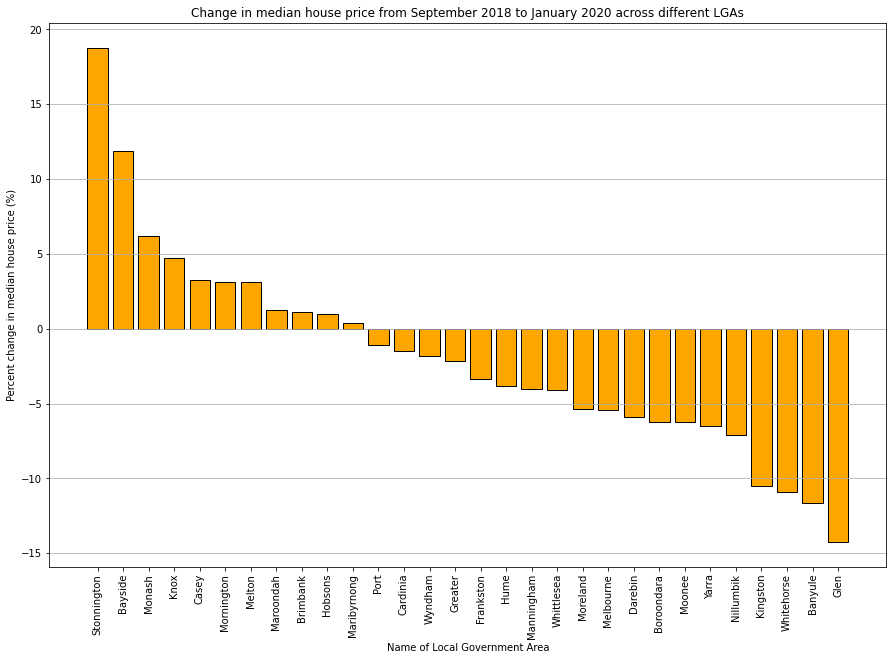

<Figure size 432x288 with 0 Axes>

In [27]:
# Create a list of x and y values from the dataframe to plot
x_values = pct_change_LGA_df["LGA_Name"]
y_values = pct_change_LGA_df["Percent change in house price"]

# Set the figure size and create the graph
plt.figure(figsize=(15,10)) 
plt.bar(x_values, y_values, color = "orange", edgecolor = "black")
plt.xticks(rotation="vertical")
plt.grid(axis = "y")

# Set the x axis, y axis and chart titles
plt.title("Change in median house price from September 2018 to January 2020 across different LGAs")
plt.xlabel("Name of Local Government Area")
plt.ylabel("Percent change in median house price (%)")

# Display the graph
plt.show()
plt.tight_layout()

In [28]:
# Save the percent change per LGA into a CSV file
pct_change_LGA_df.to_csv("output/percent_change_perLGA.csv", index = False)

In [29]:
# Creating a dataframe to analyse post-COVID data per month
monthly_sales_postcovid_df = pd.DataFrame(vic_sales_postcovid_df)

# Removing the day of the month from the date_sold column
monthly_sales_postcovid_df["date_sold"] = monthly_sales_postcovid_df["date_sold"].str[0:7]

# Calculating some summary statistics about the price data
mean_price = round(monthly_sales_postcovid_df["price"].mean(),2)
median_price = round(monthly_sales_postcovid_df["price"].median(),2)

min_price = round(monthly_sales_postcovid_df["price"].min(),2)
max_price = round(monthly_sales_postcovid_df["price"].max(),2)
print(f"The average Victorian house price in the data is ${mean_price}, while the median is ${median_price}")
print(f"The minimum Victorian house price in the data is ${min_price}, while the maximum is ${max_price}")

# Calculating the upper and lower bounds to understand any outliers
quartiles = monthly_sales_postcovid_df["price"].quantile([0.25, 0.5, 0.75])
upper_quartile = quartiles[0.75]
lower_quartile = quartiles[0.25]
iqr = upper_quartile - lower_quartile

# Determining outliers using the upper and lower bounds
upper_bound = upper_quartile + (1.5 * iqr)
lower_bound = lower_quartile - (1.5 * iqr)
print(f"Any values above ${round(upper_bound,2)} or below ${round(lower_quartile,2)} may be an outlier")

# Printing out the results
outliers = len(monthly_sales_postcovid_df.loc[(monthly_sales_postcovid_df["price"] > upper_bound) | (monthly_sales_postcovid_df["price"] < lower_bound), :])
outliers_percent = round((outliers / len(monthly_sales_postcovid_df)) * 100,2)
print(f"The number of outliers in the price data is {outliers}, or {outliers_percent}%")

The average Victorian house price in the data is $790516.7, while the median is $667000.0
The minimum Victorian house price in the data is $1000.0, while the maximum is $8000000.0
Any values above $1465625.0 or below $531250.0 may be an outlier
The number of outliers in the price data is 1440, or 6.45%


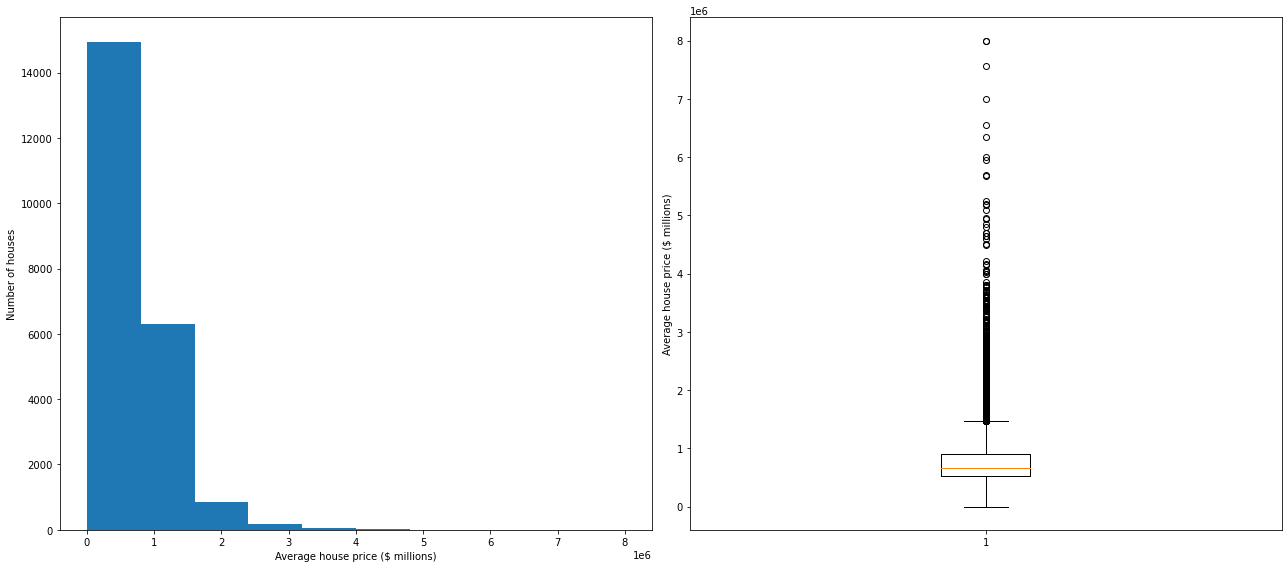

In [30]:
# Creating a histogarm and box plot for the pre-COVID house data
plt.figure(figsize=(18,8))

# Creating the histogram and setting labels
plt.subplot(1, 2, 1)
plt.hist(monthly_sales_postcovid_df["price"])
plt.ylabel("Number of houses")
plt.xlabel("Average house price ($ millions)")

# Creating the boxplot and setting labels
plt.subplot(1, 2, 2)
plt.boxplot(monthly_sales_postcovid_df["price"])
plt.ylabel("Average house price ($ millions)")

# Displaying the chart
plt.tight_layout()
plt.show()

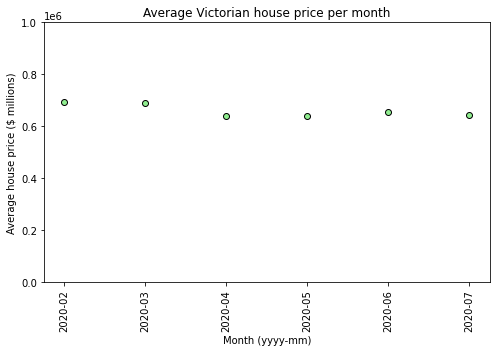

In [31]:
# Grouping the data by the month and calculating the average price
median_price_postcovid_df = monthly_sales_postcovid_df.groupby("date_sold").median().reset_index()

# Setting the x and y values for the plot
x_values = median_price_postcovid_df["date_sold"]
y_values = median_price_postcovid_df["price"]

# Creating a scatter plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, c = "lightgreen", edgecolors = "black")
plt.xticks(rotation = "vertical")

# Formatting & labelling the plot
plt.ylim(0, 1000000)
plt.title("Average Victorian house price per month")
plt.ylabel("Average house price ($ millions)")
plt.xlabel("Month (yyyy-mm)")

# Displaying the plot
plt.tight_layout()
plt.show()

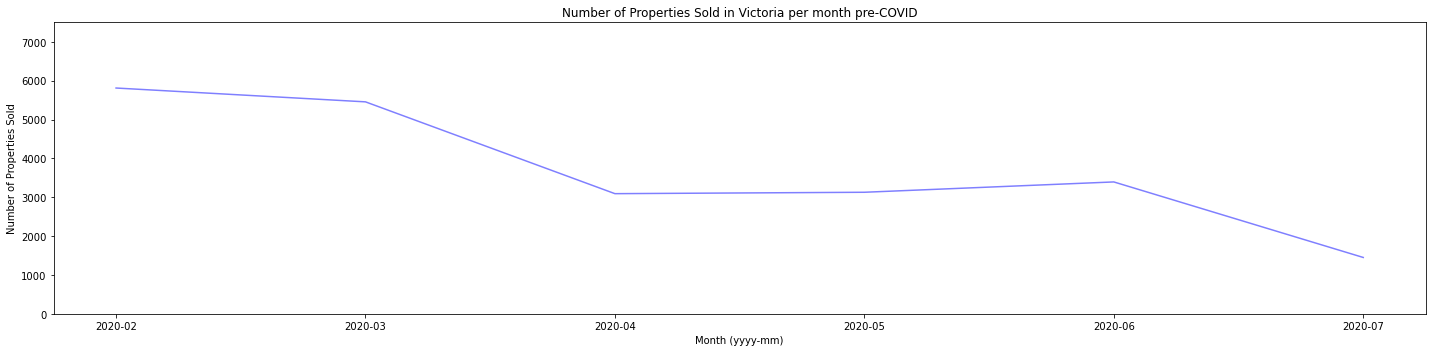

In [32]:
# Grouping the data by month and calculating the number of sales
monthly_count_postcovid_df = monthly_sales_postcovid_df.groupby("date_sold").count().reset_index()

# Setting the x and y values for the plot
x_values = monthly_count_postcovid_df["date_sold"]
y_values = monthly_count_postcovid_df["price"]

# Creating a bar chart
plt.figure(figsize=(20,5))
plt.plot(x_values, y_values, color='b', alpha=0.5)
plt.ylim(0, 7500)

# Formatting & labelling the plot
plt.xlabel('Month (yyyy-mm)')
plt.ylabel('Number of Properties Sold')
plt.title('Number of Properties Sold in Victoria per month pre-COVID')

# Displaying the plot
plt.tight_layout()
plt.show()

In [33]:
# Finding the median house price per LGA for each month in the data
rate_of_change = vic_sales_postcovid_df.groupby(["LGA_Name", "date_sold"]).median()
rate_of_change["Rate of Change"] = rate_of_change["price"].pct_change()

# Setting up a list to hold all unique LGA names and filling with the first index in the dataframe
LGA_list = rate_of_change.reset_index()
LGA_list = [LGA_list.iloc[0, 0]]

# Setting up empty lists to store the house price for each LGA, then the cumulative percent change
pct_change_list = []
pct_change_LGA = []

# Iterating through the dataframe, when the index changes, calculate the sum of the price movements and append to a list
for index, row in rate_of_change.iterrows():
    # When the index changes, enter the block
    if not index[0] in LGA_list:
        # Append the name of the LGA to the LGA list
        LGA_list.append(index[0])
        
        # Use the pct_change function (converting our list to a dataframe to do this) in combination with the sum function
        pct_change_df = pd.DataFrame(pct_change_list)
        pct_change_LGA.append(pct_change_df[0].pct_change().sum())
        
        # Reset the list of house prices for the next suburb
        pct_change_list = []

    # In every loop, add the current house price to the list of house prices
    pct_change_list.append(row["price"])

# After the loop completes, find the percent change for the final LGA
pct_change_df = pd.DataFrame(pct_change_list)
pct_change_LGA.append(pct_change_df[0].pct_change().sum())

In [34]:
# Create a dataframe from the list of LGAs and the respective percent change in house prices
pct_change_LGA_df = pd.DataFrame(LGA_list, pct_change_LGA)
pct_change_LGA_df = pct_change_LGA_df.reset_index()
pct_change_LGA_df.rename(columns ={"index": "Percent change in house price", 0: "LGA_Name"}, inplace = True)

# Multiply the percent change by 100 to make it easier to read
pct_change_LGA_df["Percent change in house price"] = pct_change_LGA_df["Percent change in house price"].apply(lambda x: x * 100)

In [35]:
# Counting the number of sales per LGA
count_of_sales = vic_sales_precovid_df.groupby("LGA_Name").count()
count_of_sales = count_of_sales["date_sold"].reset_index()

# Adding the count to the main dataframe
pct_change_LGA_df = pd.merge(pct_change_LGA_df, count_of_sales, how = "left", on = "LGA_Name")

In [36]:
# Changing the order of and renaming columns
pct_change_LGA_df = pct_change_LGA_df[["LGA_Name", "Percent change in house price", "date_sold"]]
pct_change_LGA_df.rename(columns={"date_sold": "Total Sales"}, inplace = True)

In [37]:
# Dropping rows where the number of sales is less than 100
pct_change_LGA_df = pct_change_LGA_df.loc[pct_change_LGA_df["Total Sales"] > 100, :]

pct_change_LGA_df = pct_change_LGA_df.sort_values(by = "Percent change in house price", ascending = False)

# Previewing the dataframe
pct_change_LGA_df.head()

,LGA_Name,Percent change in house price,Total Sales
15,Maribyrnong,21.461915,1243
22,Mornington,11.223346,3464
9,Greater,5.463209,2507
1,Bayside,3.563038,2095
17,Melbourne,2.927360,3461


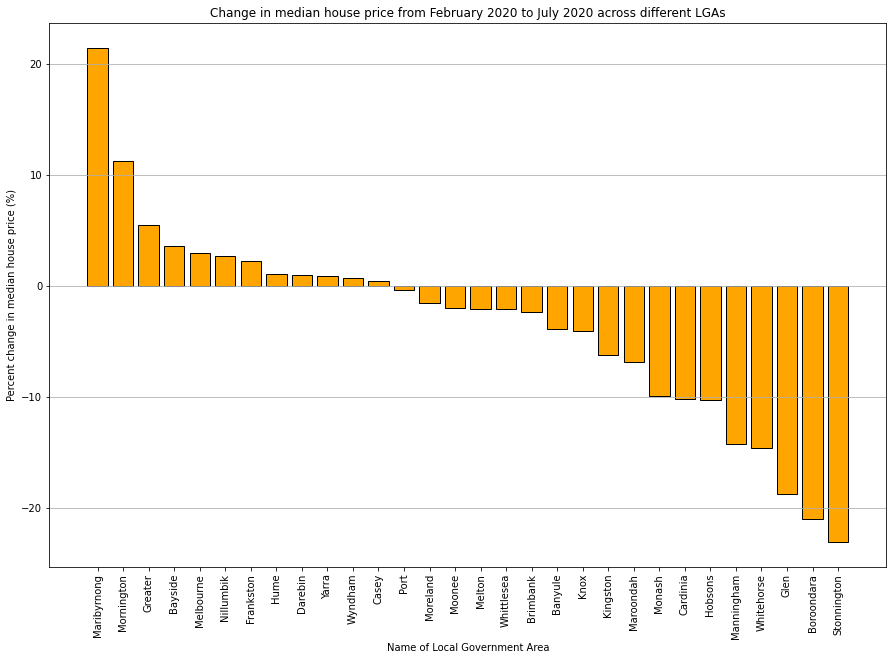

<Figure size 432x288 with 0 Axes>

In [38]:
# Create a list of x and y values from the dataframe to plot
x_values = pct_change_LGA_df["LGA_Name"]
y_values = pct_change_LGA_df["Percent change in house price"]

# Set the figure size and create the graph
plt.figure(figsize=(15,10)) 
plt.bar(x_values, y_values, color = "orange", edgecolor = "black")
plt.xticks(rotation="vertical")
plt.grid(axis = "y")

# Set the x axis, y axis and chart titles
plt.title("Change in median house price from February 2020 to July 2020 across different LGAs")
plt.xlabel("Name of Local Government Area")
plt.ylabel("Percent change in median house price (%)")

# Display the graph
plt.show()
plt.tight_layout()

In [39]:
# Save the percent change per LGA into a CSV file
pct_change_LGA_df.to_csv("output/postCOVID_percent_change_perLGA.csv", index = False)